<a href="https://colab.research.google.com/github/emanuel379/Estatistica-Computacional/blob/main/Trabalho_Estat%C3%ADstica_Computacional_Infer%C3%AAncia_sobre_modelos_de_mistura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.1 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from hmmlearn.hmm import GaussianHMM
import time

## Séries Temporais

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


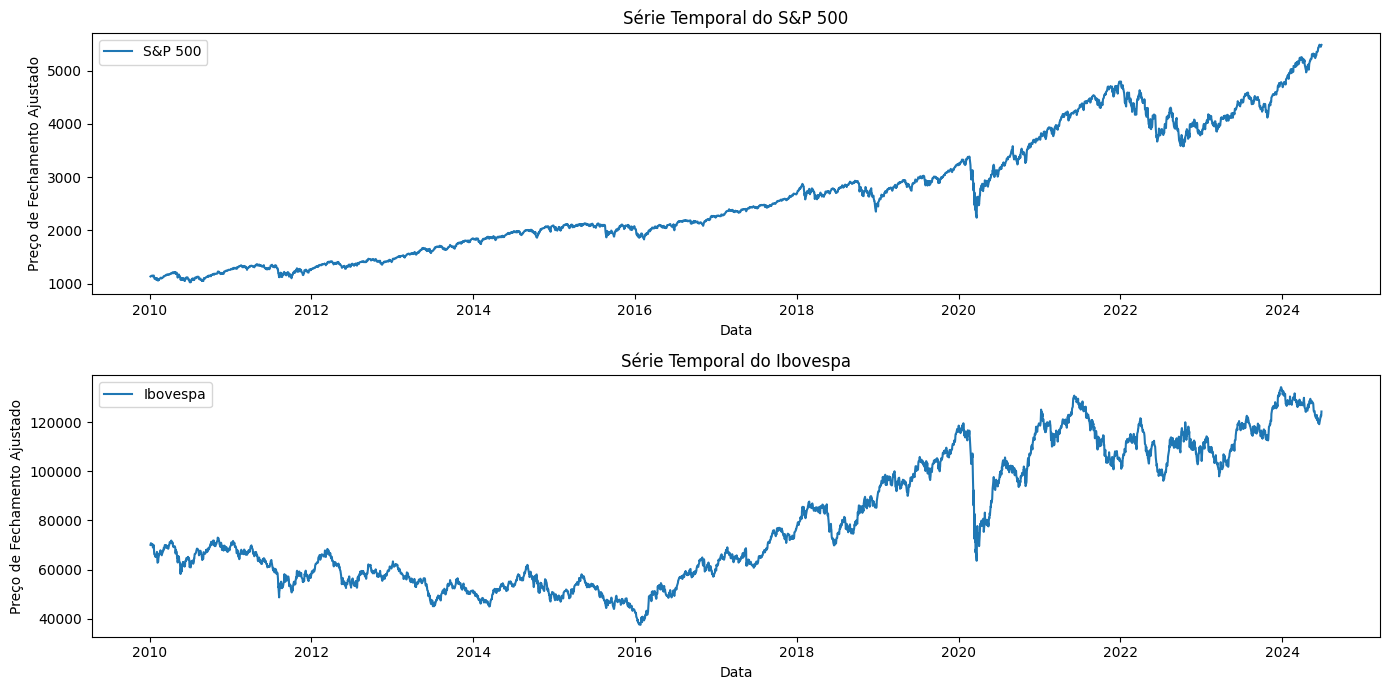

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Função para baixar e preparar os dados
def download_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)
    return data

# Baixar os dados do S&P 500
ticker_sp500 = "^GSPC"
data_sp500 = download_data(ticker_sp500, start="2010-01-01", end="2024-06-28")

# Baixar os dados do Ibovespa
ticker_ibovespa = "^BVSP"
data_ibovespa = download_data(ticker_ibovespa, start="2010-01-01", end="2024-06-28")

# Plotar as séries temporais
plt.figure(figsize=(14, 7))

# Plotar S&P 500
plt.subplot(2, 1, 1)
plt.plot(data_sp500.index, data_sp500['Adj Close'], label='S&P 500')
plt.title('Série Temporal do S&P 500')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()

# Plotar Ibovespa
plt.subplot(2, 1, 2)
plt.plot(data_ibovespa.index, data_ibovespa['Adj Close'], label='Ibovespa')
plt.title('Série Temporal do Ibovespa')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()

plt.tight_layout()
plt.show()

## Utilizando o modelo de misturas Gaussianas com o algoritmo EM

[*********************100%%**********************]  1 of 1 completed
<ipython-input-14-f63c9c931591>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Regime'] = gmm.predict(retornos)
<ipython-input-14-f63c9c931591>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Regime'] = dados['Regime'].astype(int)


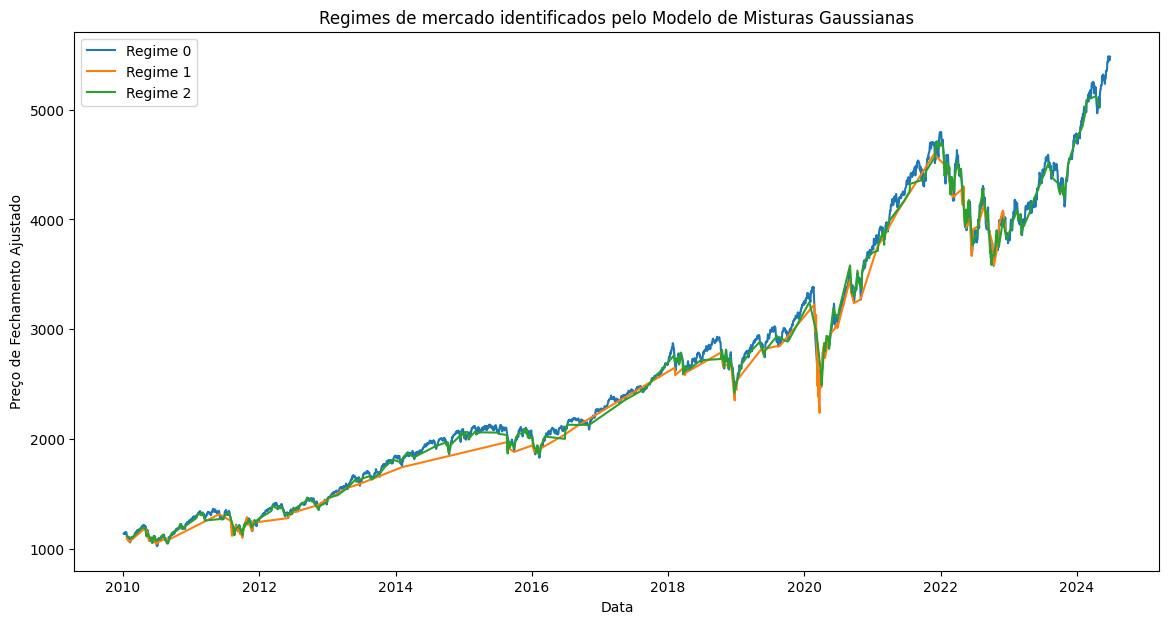

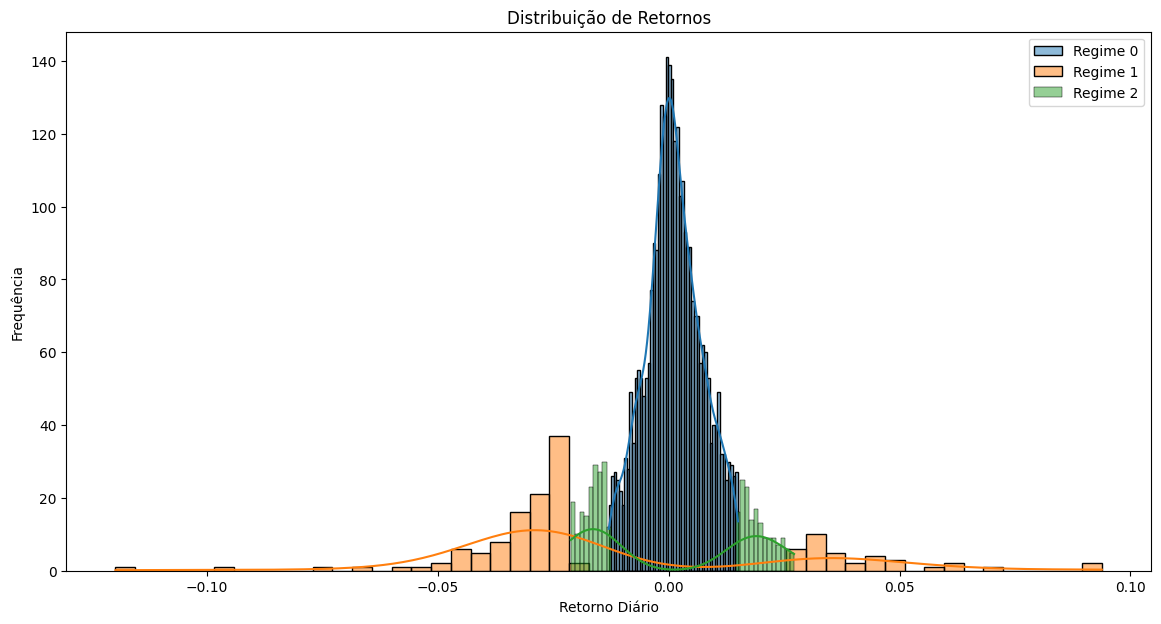

Médias dos Retornos para Cada Regime:
[[ 0.00101081]
 [-0.00386417]
 [ 0.00095746]]
Covariâncias dos Retornos para Cada Regime:
[[[3.78340343e-05]]

 [[5.70597816e-04]]

 [[1.62935830e-04]]]


<ipython-input-14-f63c9c931591>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Responsabilidade_0'] = responsabilidades[:, 0]
<ipython-input-14-f63c9c931591>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Responsabilidade_1'] = responsabilidades[:, 1]
<ipython-input-14-f63c9c931591>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

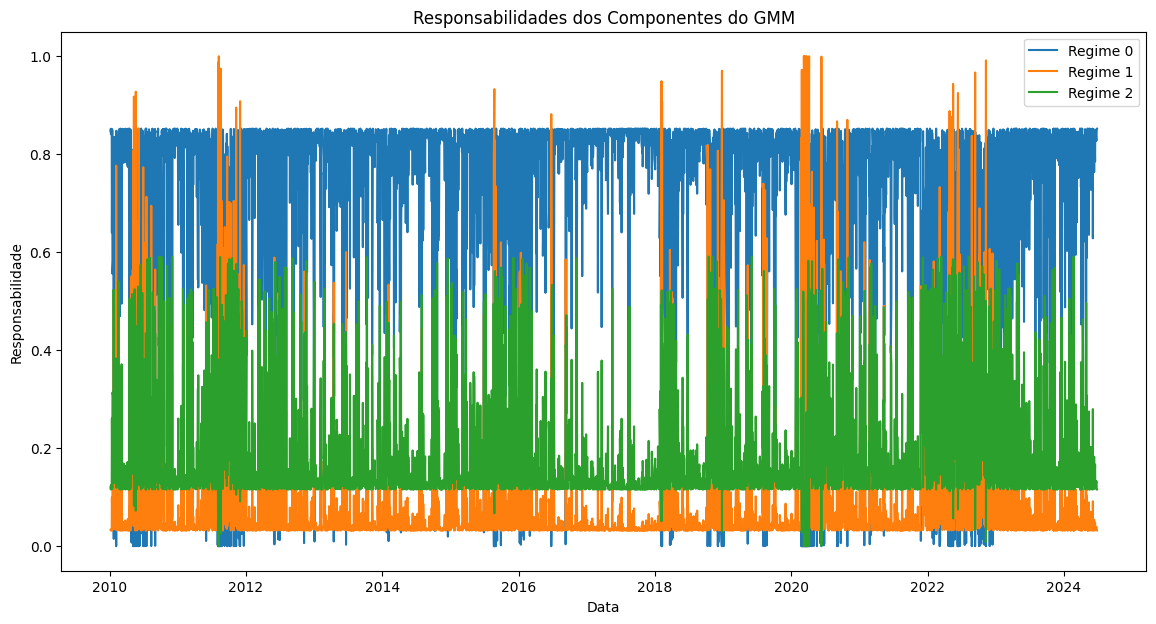

In [ ]:
start = time.time()

# Passo 1: Carregar e Preparar Dados Financeiros
# Baixar dados históricos para o S&P 500
ticker = "^GSPC"  # Índice S&P 500
dados = yf.download(ticker, start="2010-01-01", end="2024-06-28")
dados['Retorno'] = dados['Adj Close'].pct_change()

# Remover o valor NaN introduzido pelo pct_change()
dados = dados.dropna(subset=['Retorno'])

# Preparar os dados de retornos
retornos = dados['Retorno'].values.reshape(-1, 1)

# Passo 2: Ajustar um Modelo de Misturas Gaussianas
n_componentes = 3  # Número de regimes de mercado
gmm = GaussianMixture(n_components=n_componentes, random_state=42)
gmm.fit(retornos)

# Prever os regimes
dados['Regime'] = gmm.predict(retornos)
dados['Regime'] = dados['Regime'].astype(int)

# Passo 3: Avaliar o Modelo
# Plotar os regimes identificados
plt.figure(figsize=(14, 7))
for i in range(n_componentes):
    plt.plot(dados[dados['Regime'] == i]['Adj Close'], label=f'Regime {i}')
plt.title('Regimes de mercado identificados pelo Modelo de Misturas Gaussianas')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()
plt.show()

# Plotar o histograma de retornos para cada regime
plt.figure(figsize=(14, 7))
for i in range(n_componentes):
    sns.histplot(dados[dados['Regime'] == i]['Retorno'], bins=50, label=f'Regime {i}', kde=True)
plt.title('Distribuição de Retornos')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Calcular a média e a covariância dos retornos para cada regime
medias = gmm.means_
covariancias = gmm.covariances_

print("Médias dos Retornos para Cada Regime:")
print(medias)

print("Covariâncias dos Retornos para Cada Regime:")
print(covariancias)

# Calcular responsabilidades (probabilidades) para cada componente
responsabilidades = gmm.predict_proba(retornos)
dados['Responsabilidade_0'] = responsabilidades[:, 0]
dados['Responsabilidade_1'] = responsabilidades[:, 1]
dados['Responsabilidade_2'] = responsabilidades[:, 2]

# Plotar as responsabilidades
plt.figure(figsize=(14, 7))
plt.plot(dados.index, dados['Responsabilidade_0'], label='Regime 0')
plt.plot(dados.index, dados['Responsabilidade_1'], label='Regime 1')
plt.plot(dados.index, dados['Responsabilidade_2'], label='Regime 2')
plt.title('Responsabilidades dos Componentes do GMM')
plt.xlabel('Data')
plt.ylabel('Responsabilidade')
plt.legend()
plt.show()

end = time.time()

dif = end - start

In [ ]:
print(dif)

2.131124258041382


[*********************100%%**********************]  1 of 1 completed
<ipython-input-25-60f2a46dea40>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = gmm.predict(returns)
<ipython-input-25-60f2a46dea40>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = data['Regime'].astype(int)


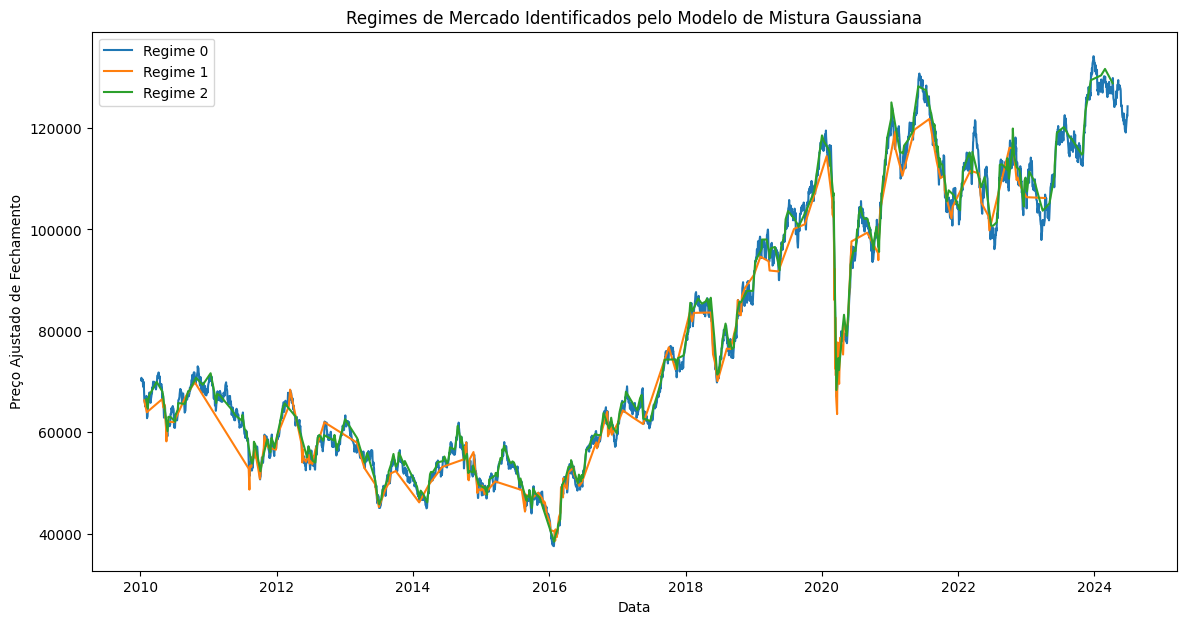

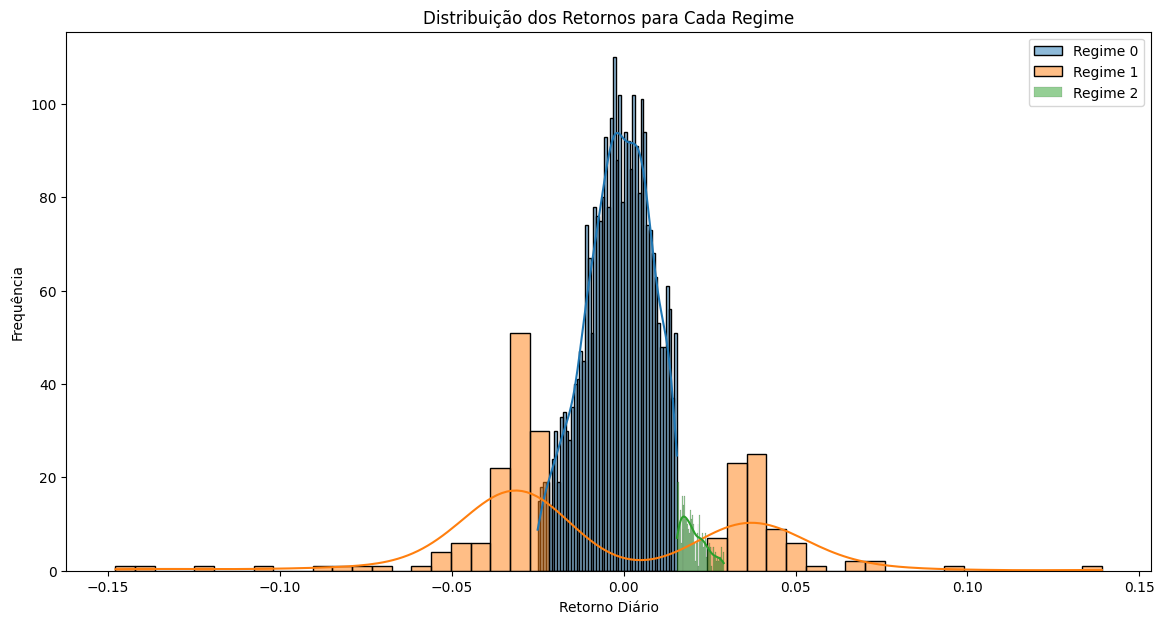

Médias dos Retornos para Cada Regime:
[[-0.00160705]
 [-0.00224594]
 [ 0.0075454 ]]
Covariâncias dos Retornos para Cada Regime:
[[[0.00010571]]

 [[0.00069281]]

 [[0.0001311 ]]]


<ipython-input-25-60f2a46dea40>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Responsibility_0'] = responsibilities[:, 0]
<ipython-input-25-60f2a46dea40>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Responsibility_1'] = responsibilities[:, 1]
<ipython-input-25-60f2a46dea40>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

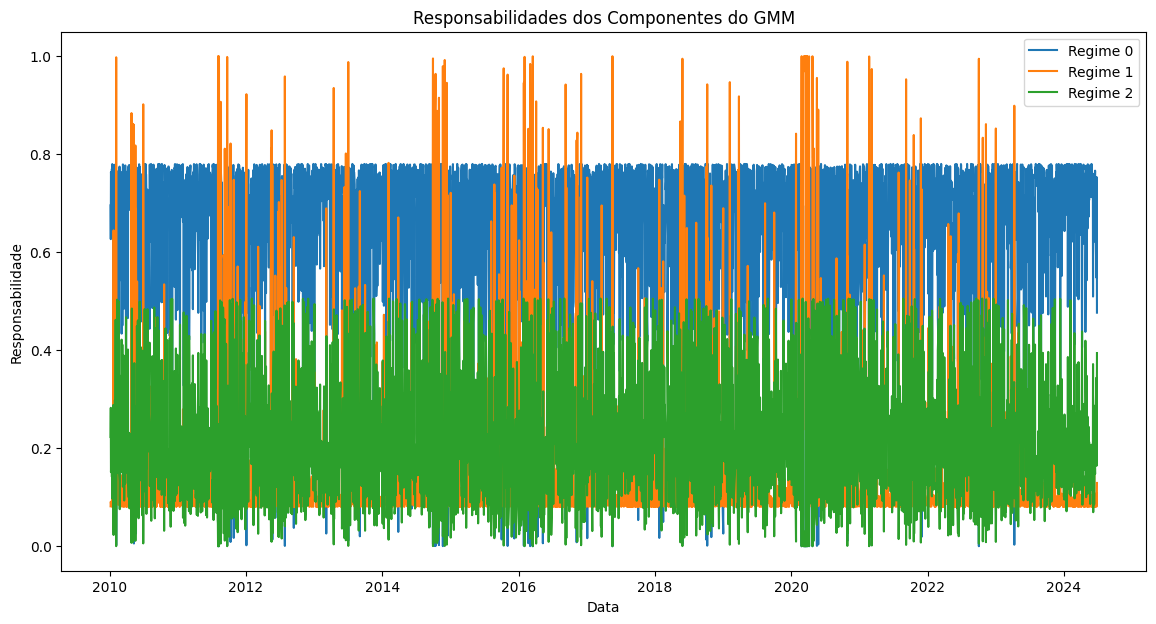

In [ ]:
 start = time.time()

# Passo 1: Carregar e Preparar Dados Financeiros
# Baixar dados históricos do S&P 500
ticker = "^BVSP"  # Índice S&P 500
data = yf.download(ticker, start="2010-01-01", end="2024-06-28")
data['Return'] = data['Adj Close'].pct_change()

# Remover o valor NaN introduzido pelo pct_change()
data = data.dropna(subset=['Return'])

# Preparar os dados de retornos
returns = data['Return'].values.reshape(-1, 1)

# Passo 2: Ajustar um Modelo de Mistura Gaussiana
n_components = 3  # Número de regimes de mercado
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(returns)

# Prever os regimes
data['Regime'] = gmm.predict(returns)
data['Regime'] = data['Regime'].astype(int)

# Passo 3: Avaliar o Modelo
# Plotar os regimes identificados
plt.figure(figsize=(14, 7))
for i in range(n_components):
    plt.plot(data[data['Regime'] == i]['Adj Close'], label=f'Regime {i}')
plt.title('Regimes de Mercado Identificados pelo Modelo de Mistura Gaussiana')
plt.xlabel('Data')
plt.ylabel('Preço Ajustado de Fechamento')
plt.legend()
plt.show()

# Plotar o histograma dos retornos para cada regime
plt.figure(figsize=(14, 7))
for i in range(n_components):
    sns.histplot(data[data['Regime'] == i]['Return'], bins=50, label=f'Regime {i}', kde=True)
plt.title('Distribuição dos Retornos para Cada Regime')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Calcular a média e a covariância dos retornos para cada regime
means = gmm.means_
covariances = gmm.covariances_

print("Médias dos Retornos para Cada Regime:")
print(means)

print("Covariâncias dos Retornos para Cada Regime:")
print(covariances)

# Calcular responsabilidades (probabilidades) para cada componente
responsibilities = gmm.predict_proba(returns)
data['Responsibility_0'] = responsibilities[:, 0]
data['Responsibility_1'] = responsibilities[:, 1]
data['Responsibility_2'] = responsibilities[:, 2]

# Plotar as responsabilidades
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Responsibility_0'], label='Regime 0')
plt.plot(data.index, data['Responsibility_1'], label='Regime 1')
plt.plot(data.index, data['Responsibility_2'], label='Regime 2')
plt.title('Responsabilidades dos Componentes do GMM')
plt.xlabel('Data')
plt.ylabel('Responsabilidade')
plt.legend()
plt.show()

end = time.time()

dif = end - start

In [ ]:
print(dif)

2.7216434478759766


## Utilizando o Hidden Marcov Method com o algoritmo EM

[*********************100%%**********************]  1 of 1 completed
<ipython-input-4-e10829c990f4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hidden_states


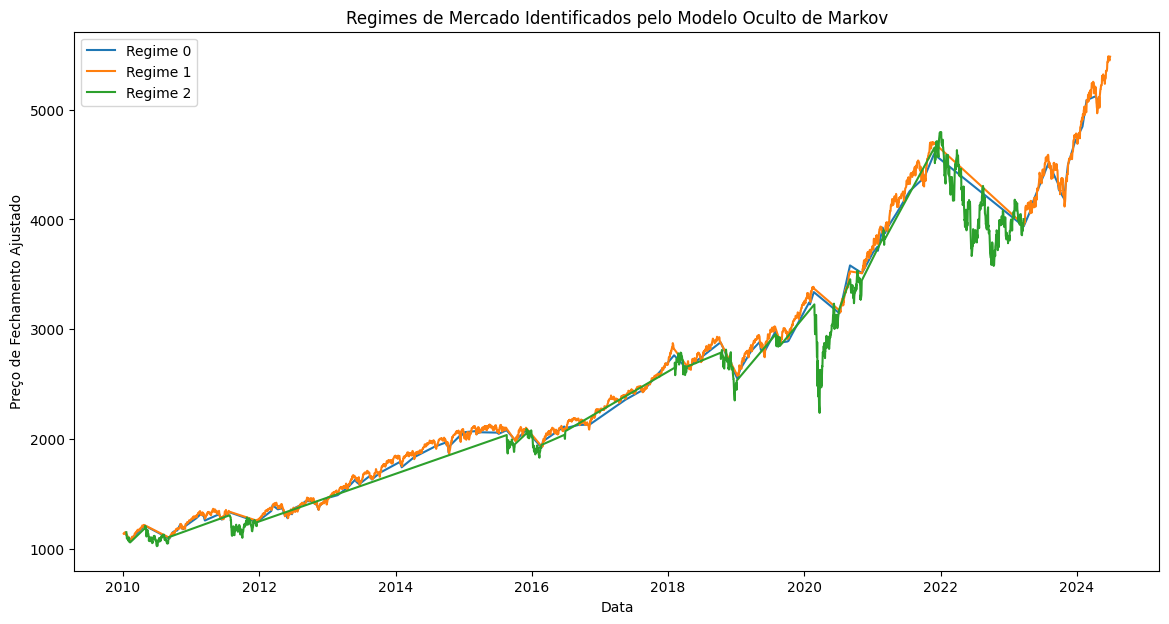

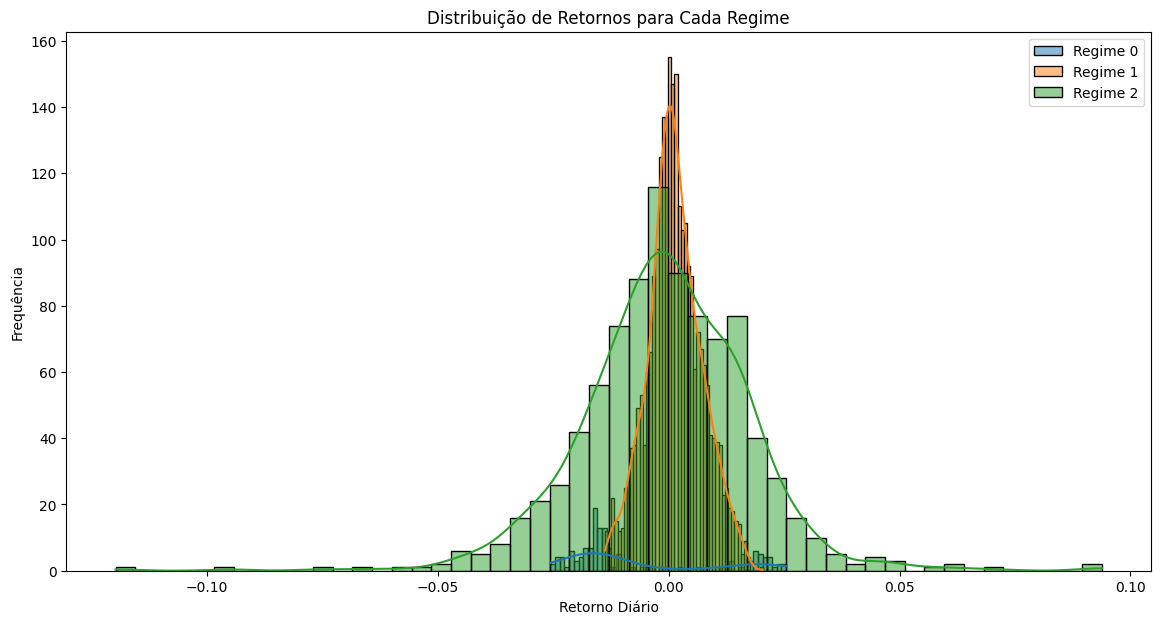

Médias dos Retornos para Cada Regime:
[[-0.00087408]
 [ 0.00118031]
 [-0.00108217]]
Covariâncias dos Retornos para Cada Regime:
[[[1.55919409e-04]]

 [[4.17450010e-05]]

 [[4.05146082e-04]]]


<ipython-input-4-e10829c990f4>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Responsibility_0'] = responsibilities[:, 0]
<ipython-input-4-e10829c990f4>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Responsibility_1'] = responsibilities[:, 1]
<ipython-input-4-e10829c990f4>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

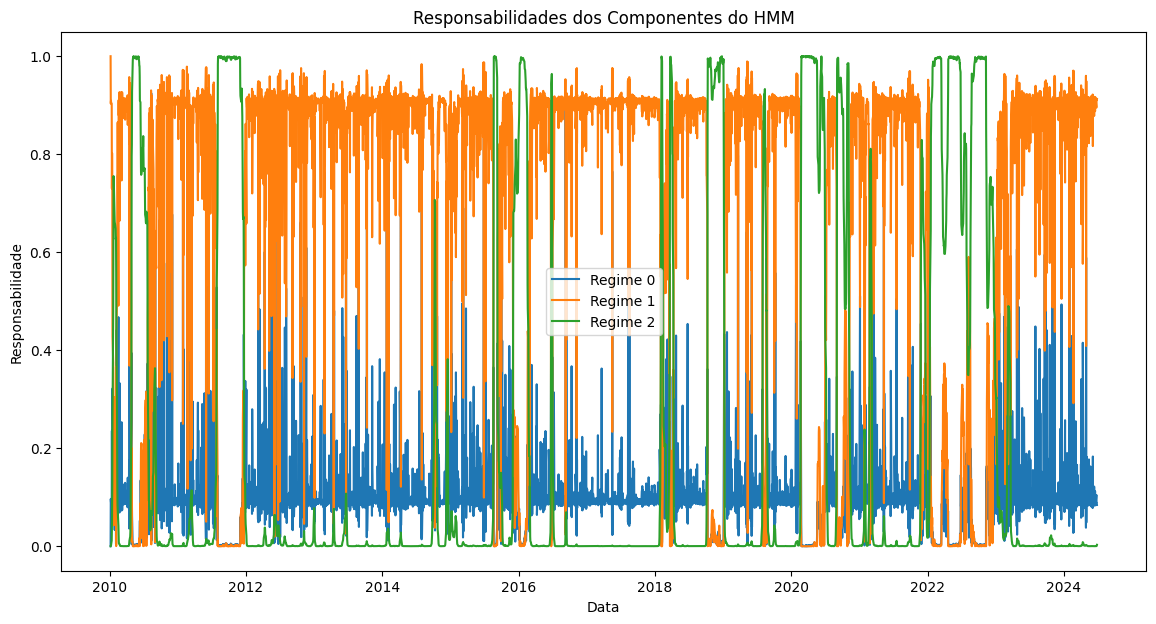

In [ ]:
start = time.time()

# Etapa 1: Carregar e Preparar Dados Financeiros
# Baixar dados históricos para o S&P 500
ticker = "^GSPC"  # Índice S&P 500
data = yf.download(ticker, start="2010-01-01", end="2024-06-28")
data['Return'] = data['Adj Close'].pct_change()

# Remover o valor NaN introduzido por pct_change()
data = data.dropna(subset=['Return'])

# Preparar os dados de retornos
returns = data['Return'].values.reshape(-1, 1)

# Etapa 2: Ajustar um Modelo de Markov Oculto (HMM)
n_components = 3  # Número de regimes de mercado
hmm = GaussianHMM(n_components=n_components, covariance_type="full", n_iter=1000, random_state=42)
hmm.fit(returns)

# Prever os regimes
hidden_states = hmm.predict(returns)
data['Regime'] = hidden_states

# Etapa 3: Avaliar o Modelo
# Plotar os regimes identificados
plt.figure(figsize=(14, 7))
for i in range(n_components):
    plt.plot(data[data['Regime'] == i]['Adj Close'], label=f'Regime {i}')
plt.title('Regimes de Mercado Identificados pelo Modelo Oculto de Markov')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()
plt.show()

# Plotar o histograma de retornos para cada regime
plt.figure(figsize=(14, 7))
for i in range(n_components):
    sns.histplot(data[data['Regime'] == i]['Return'], bins=50, label=f'Regime {i}', kde=True)
plt.title('Distribuição de Retornos para Cada Regime')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Calcular a média e a covariância dos retornos para cada regime
means = hmm.means_
covariances = hmm.covars_

print("Médias dos Retornos para Cada Regime:")
print(means)

print("Covariâncias dos Retornos para Cada Regime:")
print(covariances)

# Calcular responsabilidades (probabilidades) para cada componente
responsibilities = hmm.predict_proba(returns)
data['Responsibility_0'] = responsibilities[:, 0]
data['Responsibility_1'] = responsibilities[:, 1]
data['Responsibility_2'] = responsibilities[:, 2]

# Plotar as responsabilidades
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Responsibility_0'], label='Regime 0')
plt.plot(data.index, data['Responsibility_1'], label='Regime 1')
plt.plot(data.index, data['Responsibility_2'], label='Regime 2')
plt.title('Responsabilidades dos Componentes do HMM')
plt.xlabel('Data')
plt.ylabel('Responsabilidade')
plt.legend()
plt.show()

end = time.time()

dif = end - start

In [ ]:
print(dif)

4.38442063331604


[*********************100%%**********************]  1 of 1 completed
<ipython-input-5-faa2fea0f1f7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hidden_states


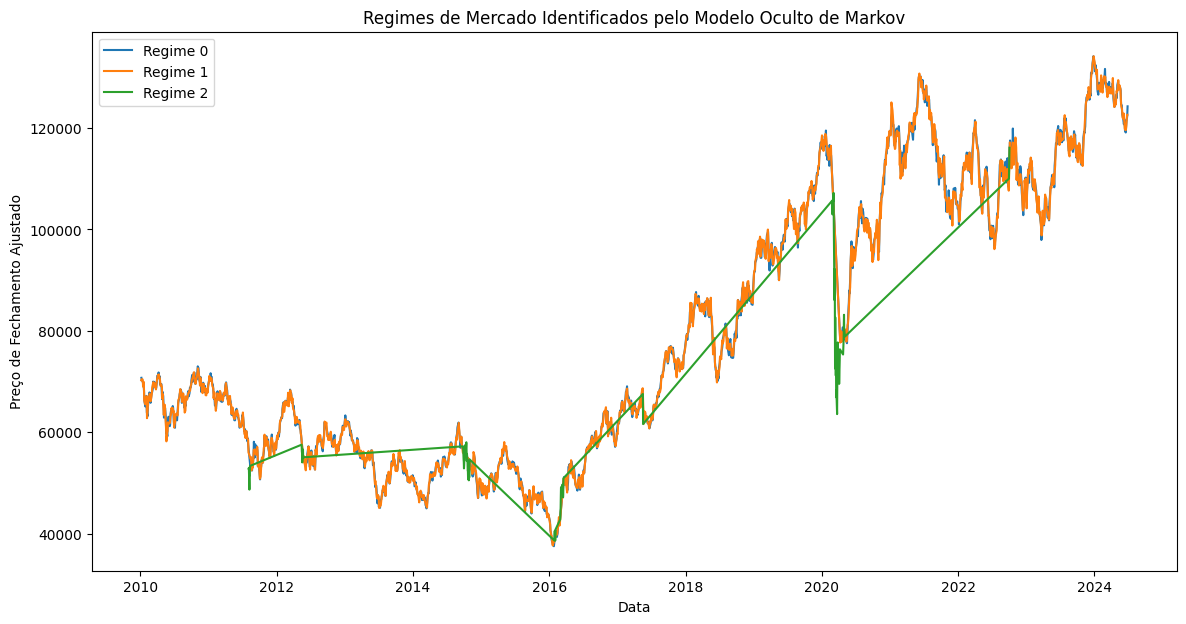

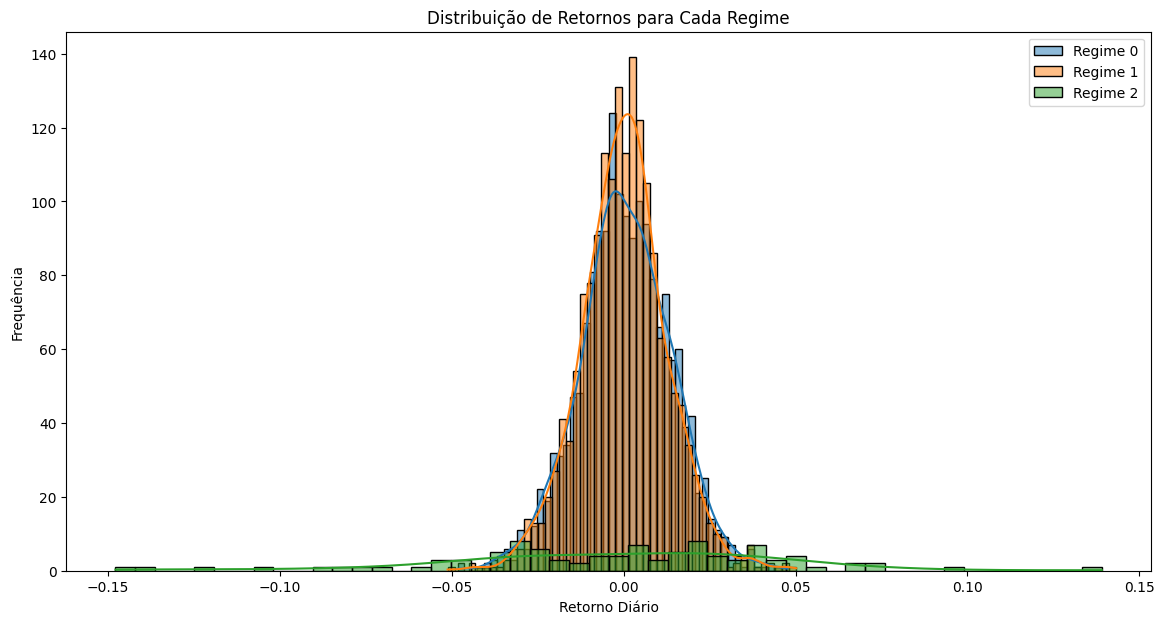

Médias dos Retornos para Cada Regime:
[[ 0.00081646]
 [-0.00013976]
 [-0.00156363]]
Covariâncias dos Retornos para Cada Regime:
[[[0.0001877 ]]

 [[0.00015704]]

 [[0.00202051]]]


<ipython-input-5-faa2fea0f1f7>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Responsibility_0'] = responsibilities[:, 0]
<ipython-input-5-faa2fea0f1f7>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Responsibility_1'] = responsibilities[:, 1]
<ipython-input-5-faa2fea0f1f7>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

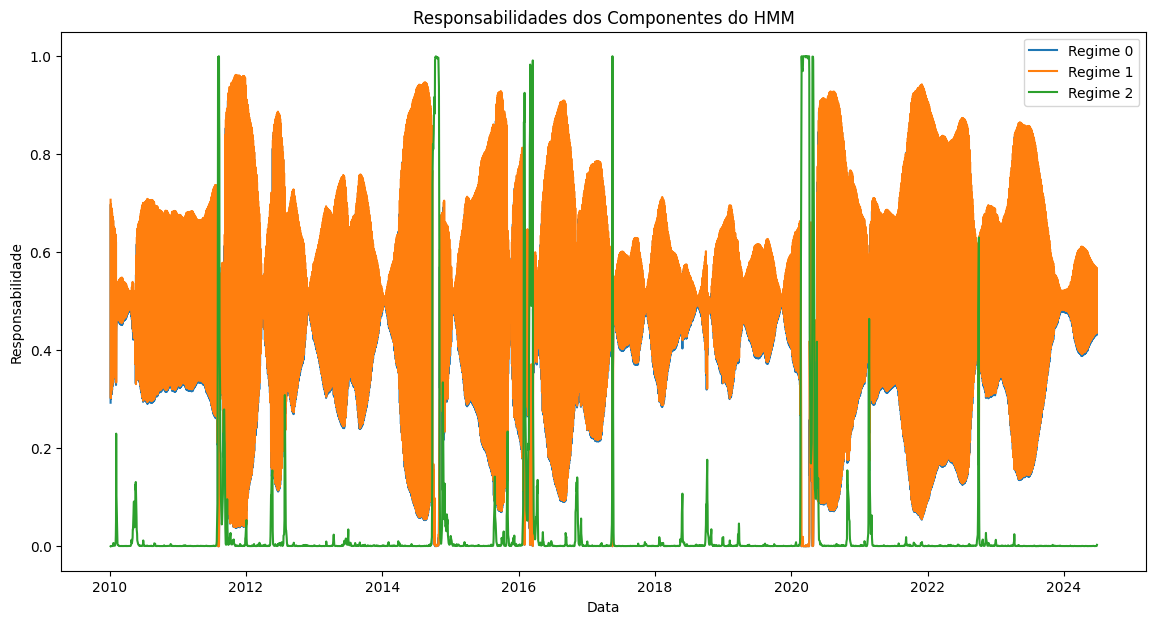

In [ ]:
start = time.time()

# Etapa 1: Carregar e Preparar Dados Financeiros
# Baixar dados históricos para o Ibovespa
ticker = "^BVSP"  # Índice Ibovespa
data = yf.download(ticker, start="2010-01-01", end="2024-06-28")
data['Return'] = data['Adj Close'].pct_change()

# Remover o valor NaN introduzido por pct_change()
data = data.dropna(subset=['Return'])

# Preparar os dados de retornos
returns = data['Return'].values.reshape(-1, 1)

# Etapa 2: Ajustar um Modelo de Markov Oculto (HMM)
n_components = 3  # Número de regimes de mercado
hmm = GaussianHMM(n_components=n_components, covariance_type="full", n_iter=1000, random_state=42)
hmm.fit(returns)

# Prever os regimes
hidden_states = hmm.predict(returns)
data['Regime'] = hidden_states

# Etapa 3: Avaliar o Modelo
# Plotar os regimes identificados
plt.figure(figsize=(14, 7))
for i in range(n_components):
    plt.plot(data[data['Regime'] == i]['Adj Close'], label=f'Regime {i}')
plt.title('Regimes de Mercado Identificados pelo Modelo Oculto de Markov')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()
plt.show()

# Plotar o histograma de retornos para cada regime
plt.figure(figsize=(14, 7))
for i in range(n_components):
    sns.histplot(data[data['Regime'] == i]['Return'], bins=50, label=f'Regime {i}', kde=True)
plt.title('Distribuição de Retornos para Cada Regime')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Calcular a média e a covariância dos retornos para cada regime
means = hmm.means_
covariances = hmm.covars_

print("Médias dos Retornos para Cada Regime:")
print(means)

print("Covariâncias dos Retornos para Cada Regime:")
print(covariances)

# Calcular responsabilidades (probabilidades) para cada componente
responsibilities = hmm.predict_proba(returns)
data['Responsibility_0'] = responsibilities[:, 0]
data['Responsibility_1'] = responsibilities[:, 1]
data['Responsibility_2'] = responsibilities[:, 2]

# Plotar as responsabilidades
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Responsibility_0'], label='Regime 0')
plt.plot(data.index, data['Responsibility_1'], label='Regime 1')
plt.plot(data.index, data['Responsibility_2'], label='Regime 2')
plt.title('Responsabilidades dos Componentes do HMM')
plt.xlabel('Data')
plt.ylabel('Responsabilidade')
plt.legend()
plt.show()

end = time.time()

dif = end - start

In [ ]:
print(dif)

1.625375509262085


## Utilizando GMM com a abordagem Bayesiana

[*********************100%%**********************]  1 of 1 completed
<ipython-input-21-ee9059768d59>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = vbgmm.predict(returns)
<ipython-input-21-ee9059768d59>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = data['Regime'].astype(int)


Initialization 0
  Iteration 10	 time lapse 0.02981s	 ll change 11.94802
  Iteration 20	 time lapse 0.01810s	 ll change 0.67430
  Iteration 30	 time lapse 0.01560s	 ll change 0.52912
  Iteration 40	 time lapse 0.01589s	 ll change 0.41934
  Iteration 50	 time lapse 0.01715s	 ll change 0.23131
  Iteration 60	 time lapse 0.01665s	 ll change 0.07818
  Iteration 70	 time lapse 0.01626s	 ll change 0.01702
  Iteration 80	 time lapse 0.01616s	 ll change 0.00217
Initialization converged: True	 time lapse 0.15079s	 ll 15102.80198


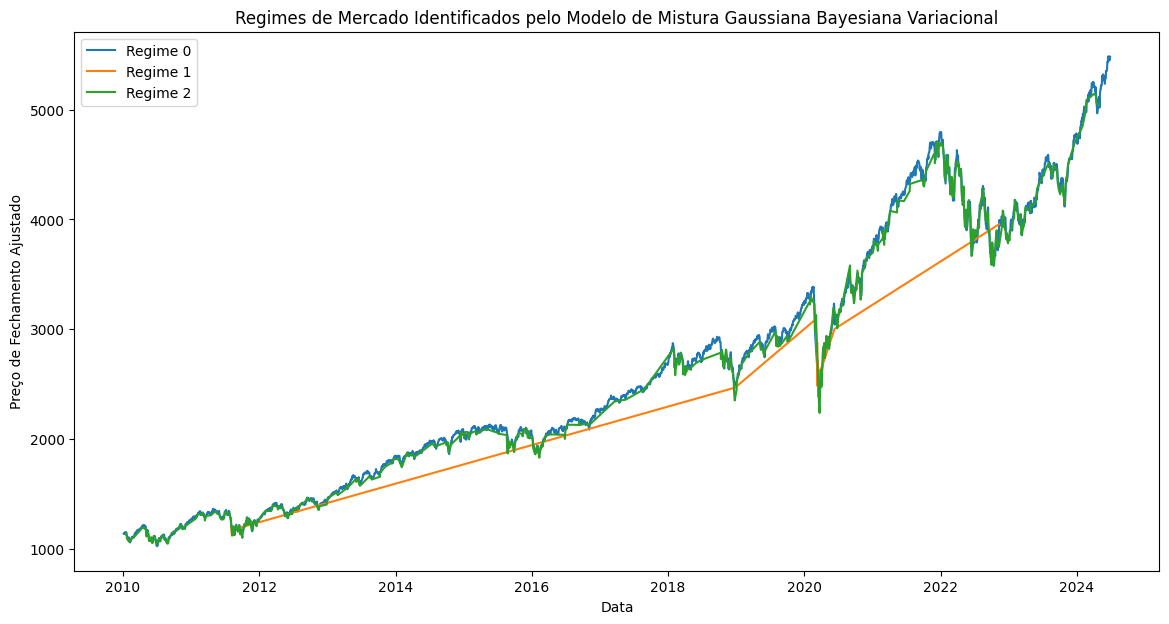

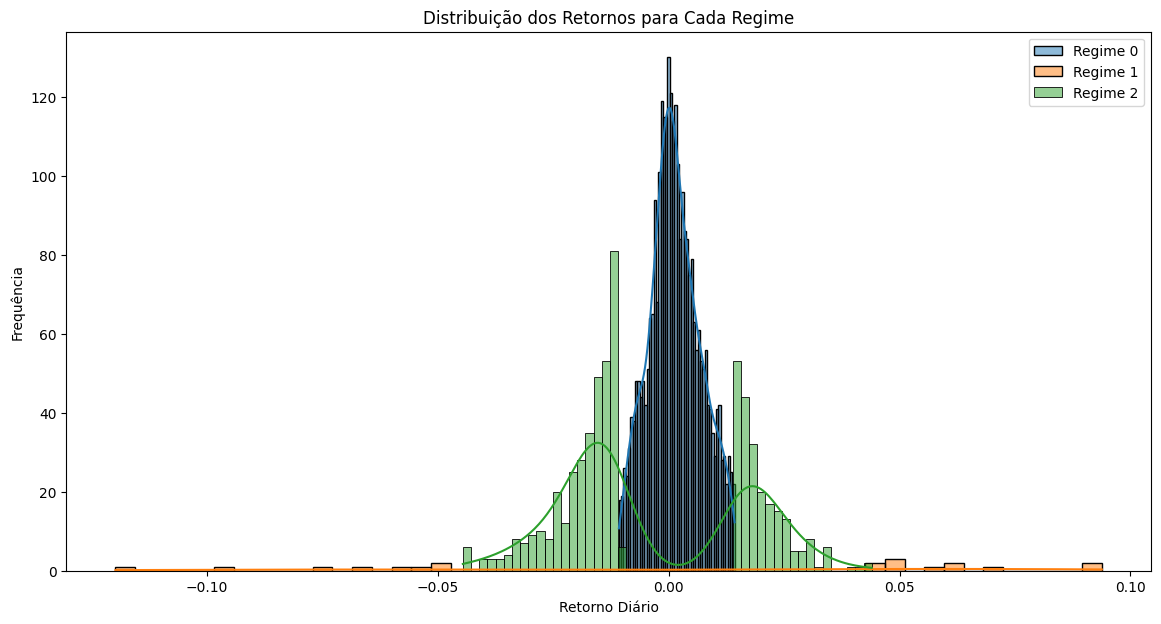

Médias dos Retornos para Cada Regime:
[[ 0.00124033]
 [-0.00051437]
 [-0.00122026]]
Covariâncias dos Retornos para Cada Regime:
[[[3.70475817e-05]]

 [[1.97427638e-03]]

 [[2.21109171e-04]]]


<ipython-input-21-ee9059768d59>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Responsibility_0'] = responsibilities[:, 0]
<ipython-input-21-ee9059768d59>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Responsibility_1'] = responsibilities[:, 1]
<ipython-input-21-ee9059768d59>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

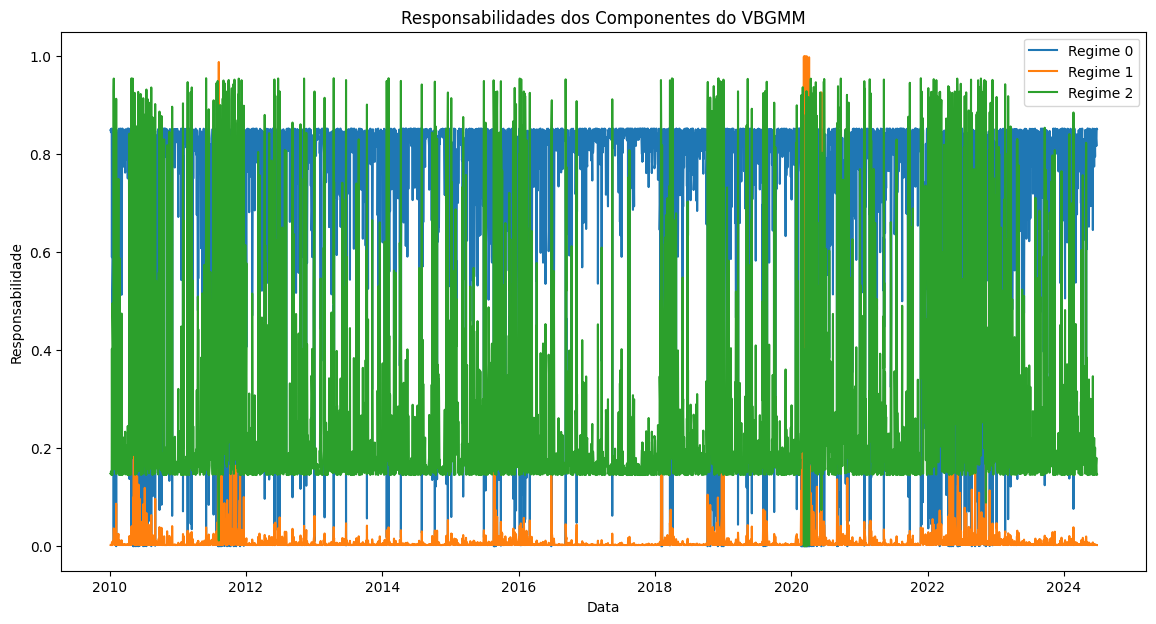

In [ ]:
start = time.time()

# Passo 1: Carregar e Preparar Dados Financeiros
# Baixar dados históricos do S&P 500
ticker = "^GSPC"  # Índice S&P 500
data = yf.download(ticker, start="2010-01-01", end="2024-06-28")
data['Return'] = data['Adj Close'].pct_change()

# Remover os valores NaN introduzidos pelo pct_change()
data = data.dropna(subset=['Return'])

# Preparar os dados de retornos
returns = data['Return'].values.reshape(-1, 1)

# Passo 2: Ajustar um Modelo de Mistura Gaussiana Bayesiana Variacional
n_components = 3  # Número de regimes de mercado
vbgmm = BayesianGaussianMixture(n_components=n_components, covariance_type='full', max_iter=1000, random_state=42, verbose=2)
vbgmm.fit(returns)

# Prever os regimes
data['Regime'] = vbgmm.predict(returns)
data['Regime'] = data['Regime'].astype(int)

# Passo 3: Avaliar o Modelo
# Plotar os regimes identificados
plt.figure(figsize=(14, 7))
for i in range(n_components):
    plt.plot(data[data['Regime'] == i]['Adj Close'], label=f'Regime {i}')
plt.title('Regimes de Mercado Identificados pelo Modelo de Mistura Gaussiana Bayesiana Variacional')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()
plt.show()

# Plotar o histograma dos retornos para cada regime
plt.figure(figsize=(14, 7))
for i in range(n_components):
    sns.histplot(data[data['Regime'] == i]['Return'], bins=50, label=f'Regime {i}', kde=True)
plt.title('Distribuição dos Retornos para Cada Regime')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Calcular a média e a covariância dos retornos para cada regime
means = vbgmm.means_
covariances = vbgmm.covariances_

print("Médias dos Retornos para Cada Regime:")
print(means)

print("Covariâncias dos Retornos para Cada Regime:")
print(covariances)

# Calcular responsabilidades (probabilidades) para cada componente
responsibilities = vbgmm.predict_proba(returns)
data['Responsibility_0'] = responsibilities[:, 0]
data['Responsibility_1'] = responsibilities[:, 1]
data['Responsibility_2'] = responsibilities[:, 2]

# Plotar as responsabilidades
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Responsibility_0'], label='Regime 0')
plt.plot(data.index, data['Responsibility_1'], label='Regime 1')
plt.plot(data.index, data['Responsibility_2'], label='Regime 2')
plt.title('Responsabilidades dos Componentes do VBGMM')
plt.xlabel('Data')
plt.ylabel('Responsabilidade')
plt.legend()
plt.show()

end = time.time()

dif = end - start

In [ ]:
print(dif)

1.677307367324829


[*********************100%%**********************]  1 of 1 completed


Initialization 0
  Iteration 10	 time lapse 0.03818s	 ll change 8.61323
  Iteration 20	 time lapse 0.03936s	 ll change 1.76900
  Iteration 30	 time lapse 0.02812s	 ll change 0.91118
  Iteration 40	 time lapse 0.03134s	 ll change 0.36359
  Iteration 50	 time lapse 0.03158s	 ll change 0.13991
  Iteration 60	 time lapse 0.03636s	 ll change 0.11961
  Iteration 70	 time lapse 0.03396s	 ll change 0.25836
  Iteration 80	 time lapse 0.03819s	 ll change 0.68879
  Iteration 90	 time lapse 0.03744s	 ll change 0.38584
  Iteration 100	 time lapse 0.04464s	 ll change 0.04745
  Iteration 110	 time lapse 0.04234s	 ll change 0.00376
  Iteration 120	 time lapse 0.04002s	 ll change 0.00109
Initialization converged: True	 time lapse 0.45353s	 ll 13511.45887


<ipython-input-29-4c74415904a1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = vbgmm.predict(returns)
<ipython-input-29-4c74415904a1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = data['Regime'].astype(int)


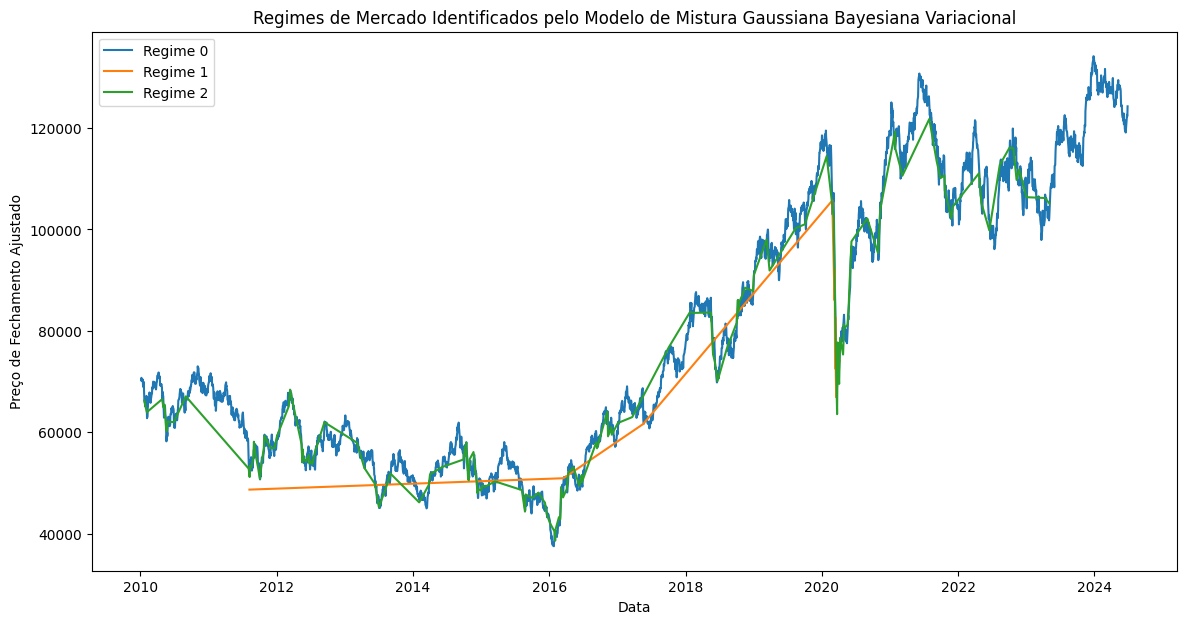

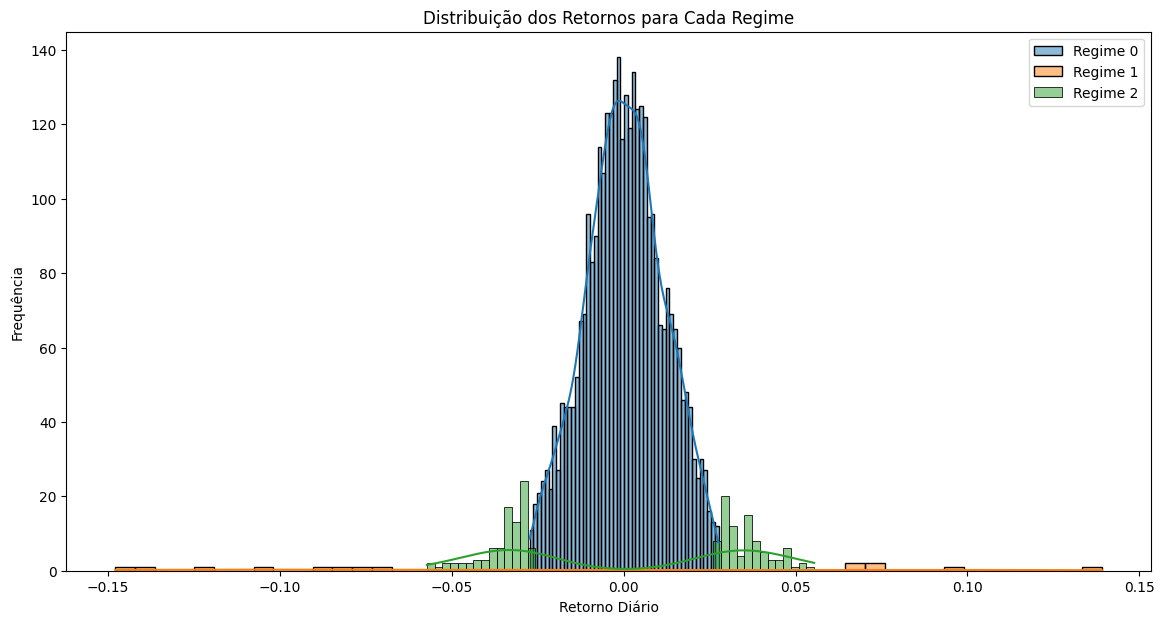

Médias dos Retornos para Cada Regime:
[[ 0.00034332]
 [-0.01440752]
 [ 0.00064632]]
Covariâncias dos Retornos para Cada Regime:
[[[0.00013083]]

 [[0.00457224]]

 [[0.00040614]]]


<ipython-input-29-4c74415904a1>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Responsibility_0'] = responsibilities[:, 0]
<ipython-input-29-4c74415904a1>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Responsibility_1'] = responsibilities[:, 1]
<ipython-input-29-4c74415904a1>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

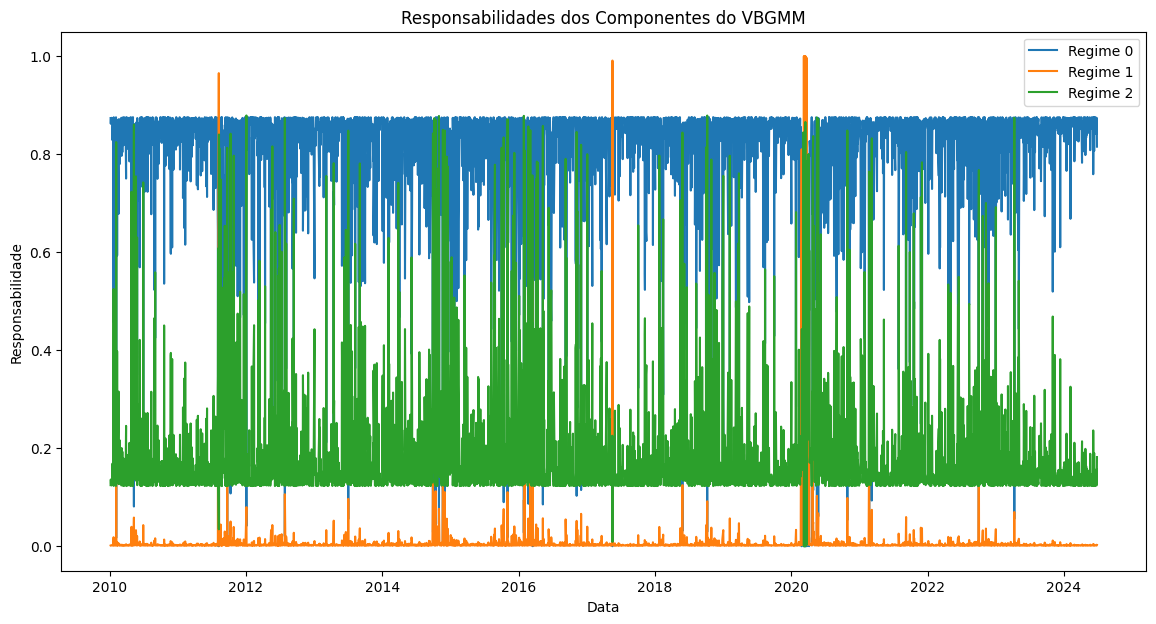

In [ ]:
start = time.time()

# Passo 1: Carregar e Preparar Dados Financeiros
# Baixar dados históricos do Ibovespa
ticker = "^BVSP"  # Índice Ibovespa
data = yf.download(ticker, start="2010-01-01", end="2024-06-28")
data['Return'] = data['Adj Close'].pct_change()

# Remover os valores NaN introduzidos pelo pct_change()
data = data.dropna(subset=['Return'])

# Preparar os dados de retornos
returns = data['Return'].values.reshape(-1, 1)

# Passo 2: Ajustar um Modelo de Mistura Gaussiana Bayesiana Variacional
n_components = 3  # Número de regimes de mercado
vbgmm = BayesianGaussianMixture(n_components=n_components, covariance_type='full', max_iter=1000, random_state=42, verbose=2)
vbgmm.fit(returns)

# Prever os regimes
data['Regime'] = vbgmm.predict(returns)
data['Regime'] = data['Regime'].astype(int)

# Passo 3: Avaliar o Modelo
# Plotar os regimes identificados
plt.figure(figsize=(14, 7))
for i in range(n_components):
    plt.plot(data[data['Regime'] == i]['Adj Close'], label=f'Regime {i}')
plt.title('Regimes de Mercado Identificados pelo Modelo de Mistura Gaussiana Bayesiana Variacional')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()
plt.show()

# Plotar o histograma dos retornos para cada regime
plt.figure(figsize=(14, 7))
for i in range(n_components):
    sns.histplot(data[data['Regime'] == i]['Return'], bins=50, label=f'Regime {i}', kde=True)
plt.title('Distribuição dos Retornos para Cada Regime')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Calcular a média e a covariância dos retornos para cada regime
means = vbgmm.means_
covariances = vbgmm.covariances_

print("Médias dos Retornos para Cada Regime:")
print(means)

print("Covariâncias dos Retornos para Cada Regime:")
print(covariances)

# Calcular responsabilidades (probabilidades) para cada componente
responsibilities = vbgmm.predict_proba(returns)
data['Responsibility_0'] = responsibilities[:, 0]
data['Responsibility_1'] = responsibilities[:, 1]
data['Responsibility_2'] = responsibilities[:, 2]

# Plotar as responsabilidades
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Responsibility_0'], label='Regime 0')
plt.plot(data.index, data['Responsibility_1'], label='Regime 1')
plt.plot(data.index, data['Responsibility_2'], label='Regime 2')
plt.title('Responsabilidades dos Componentes do VBGMM')
plt.xlabel('Data')
plt.ylabel('Responsabilidade')
plt.legend()
plt.show()

end = time.time()

dif = end - start

In [ ]:
print(dif)

2.801020622253418


[*********************100%%**********************]  1 of 1 completed


Initialization 0
  Iteration 10	 time lapse 0.05199s	 ll change 9.22646
  Iteration 20	 time lapse 0.03353s	 ll change 2.38208
  Iteration 30	 time lapse 0.03262s	 ll change 1.22899
  Iteration 40	 time lapse 0.03223s	 ll change 0.38673
  Iteration 50	 time lapse 0.03224s	 ll change 0.20809
  Iteration 60	 time lapse 0.03728s	 ll change 0.12109
  Iteration 70	 time lapse 0.03597s	 ll change 0.07372
  Iteration 80	 time lapse 0.03355s	 ll change 0.04535
  Iteration 90	 time lapse 0.04634s	 ll change 0.02711
  Iteration 100	 time lapse 0.03152s	 ll change 0.01488
  Iteration 110	 time lapse 0.03177s	 ll change 0.00649
  Iteration 120	 time lapse 0.03490s	 ll change 0.00072
Initialization converged: True	 time lapse 0.43447s	 ll 15097.02499


<ipython-input-23-814691bd491e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = vbgmm.predict(returns)
<ipython-input-23-814691bd491e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = data['Regime'].astype(int)


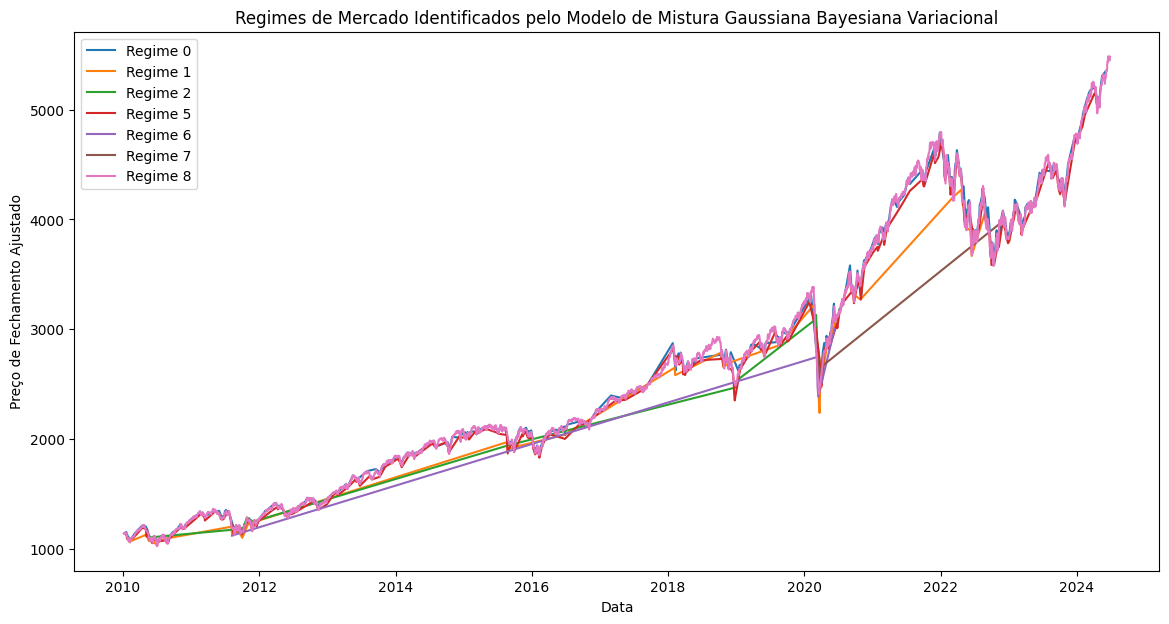

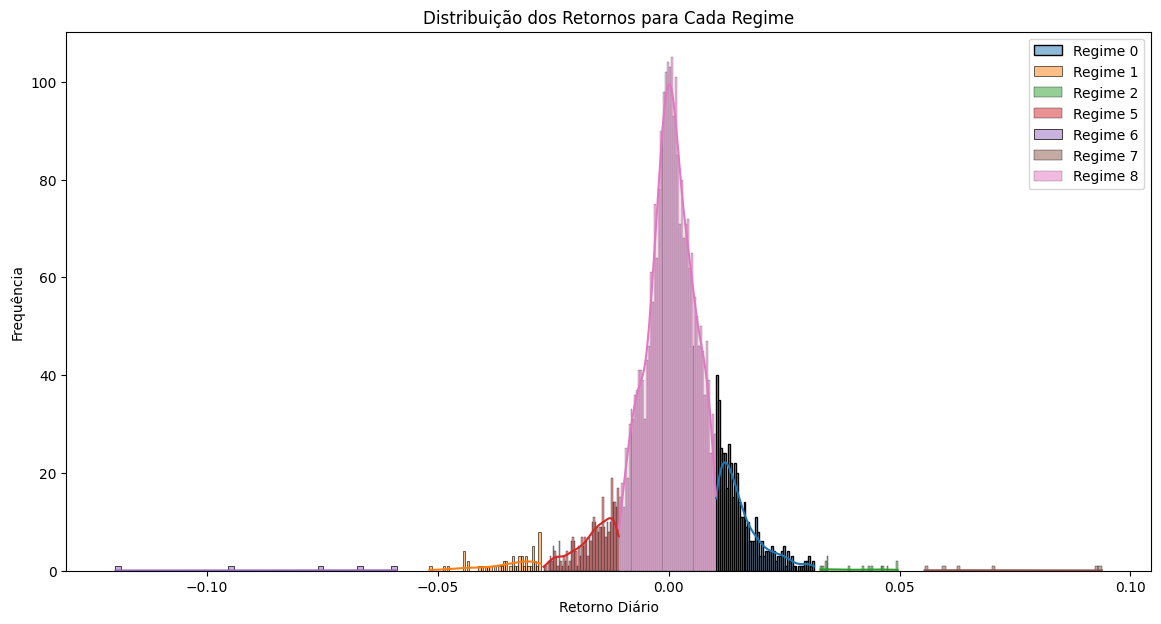

Médias dos Retornos para Cada Regime:
[[ 0.0038524 ]
 [-0.01332914]
 [ 0.00942429]
 [-0.00734935]
 [ 0.00497572]
 [-0.00463777]
 [-0.02700928]
 [ 0.02324516]
 [ 0.00079397]
 [ 0.00049261]]
Covariâncias dos Retornos para Cada Regime:
[[[9.63983660e-05]]

 [[2.89864564e-04]]

 [[5.03300087e-04]]

 [[1.67262375e-04]]

 [[1.07018913e-04]]

 [[1.39054676e-04]]

 [[2.42270872e-03]]

 [[1.30353963e-03]]

 [[2.57981132e-05]]

 [[1.19187927e-04]]]


<ipython-input-23-814691bd491e>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Responsibility_{i}'] = responsibilities[:, i]
<ipython-input-23-814691bd491e>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Responsibility_{i}'] = responsibilities[:, i]
<ipython-input-23-814691bd491e>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

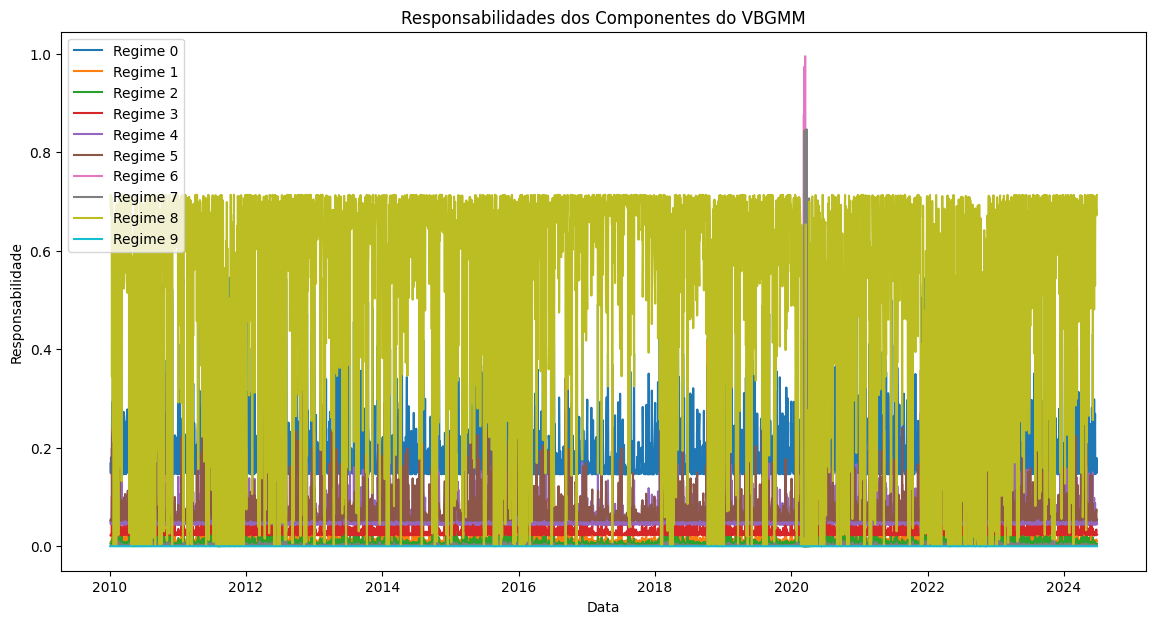

In [ ]:
start = time.time()

# Passo 1: Carregar e Preparar Dados Financeiros
# Baixar dados históricos do Ibovespa
ticker = "^GSPC"  # Índice S&P 500
data = yf.download(ticker, start="2010-01-01", end="2024-06-28")
data['Return'] = data['Adj Close'].pct_change()

# Remover os valores NaN introduzidos pelo pct_change()
data = data.dropna(subset=['Return'])

# Preparar os dados de retornos
returns = data['Return'].values.reshape(-1, 1)

# Passo 2: Ajustar um Modelo de Mistura Gaussiana Bayesiana Variacional
max_components = 10  # Número máximo de regimes de mercado a serem considerados
vbgmm = BayesianGaussianMixture(n_components=max_components, covariance_type='full', max_iter=1000, random_state=42, verbose=2)
vbgmm.fit(returns)

# Prever os regimes
data['Regime'] = vbgmm.predict(returns)
data['Regime'] = data['Regime'].astype(int)

# Passo 3: Avaliar o Modelo
# Plotar os regimes identificados
plt.figure(figsize=(14, 7))
for i in range(max_components):
    regime_data = data[data['Regime'] == i]
    if not regime_data.empty:
        plt.plot(regime_data['Adj Close'], label=f'Regime {i}')
plt.title('Regimes de Mercado Identificados pelo Modelo de Mistura Gaussiana Bayesiana Variacional')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()
plt.show()

# Plotar o histograma dos retornos para cada regime
plt.figure(figsize=(14, 7))
for i in range(max_components):
    regime_data = data[data['Regime'] == i]
    if not regime_data.empty:
        sns.histplot(regime_data['Return'], bins=50, label=f'Regime {i}', kde=True)
plt.title('Distribuição dos Retornos para Cada Regime')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Calcular a média e a covariância dos retornos para cada regime
means = vbgmm.means_
covariances = vbgmm.covariances_

print("Médias dos Retornos para Cada Regime:")
print(means)

print("Covariâncias dos Retornos para Cada Regime:")
print(covariances)

# Calcular responsabilidades (probabilidades) para cada componente
responsibilities = vbgmm.predict_proba(returns)
for i in range(max_components):
    data[f'Responsibility_{i}'] = responsibilities[:, i]

# Plotar as responsabilidades
plt.figure(figsize=(14, 7))
for i in range(max_components):
    plt.plot(data.index, data[f'Responsibility_{i}'], label=f'Regime {i}')
plt.title('Responsabilidades dos Componentes do VBGMM')
plt.xlabel('Data')
plt.ylabel('Responsabilidade')
plt.legend()
plt.show()

end = time.time()

dif = end - start

In [ ]:
print(dif)

3.247539520263672


[*********************100%%**********************]  1 of 1 completed


Initialization 0
  Iteration 10	 time lapse 0.05111s	 ll change 6.62793
  Iteration 20	 time lapse 0.04662s	 ll change 2.36488
  Iteration 30	 time lapse 0.05981s	 ll change 1.14878
  Iteration 40	 time lapse 0.04710s	 ll change 0.64920
  Iteration 50	 time lapse 0.04749s	 ll change 0.42360
  Iteration 60	 time lapse 0.04991s	 ll change 0.32271
  Iteration 70	 time lapse 0.07512s	 ll change 0.27074
  Iteration 80	 time lapse 0.05712s	 ll change 0.21466
  Iteration 90	 time lapse 0.04608s	 ll change 0.15565
  Iteration 100	 time lapse 0.04425s	 ll change 0.12390
  Iteration 110	 time lapse 0.06876s	 ll change 0.10502
  Iteration 120	 time lapse 0.06202s	 ll change 0.09172
  Iteration 130	 time lapse 0.06728s	 ll change 0.08286
  Iteration 140	 time lapse 0.03204s	 ll change 0.07746
  Iteration 150	 time lapse 0.03187s	 ll change 0.07481
  Iteration 160	 time lapse 0.03178s	 ll change 0.07451
  Iteration 170	 time lapse 0.03238s	 ll change 0.07650
  Iteration 180	 time lapse 0.03891s	 ll

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
<ipython-input-31-e604419b7292>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = vbgmm.predict(returns)
<ipython-input-31-e604419b7292>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = data['Regime'].astype(int)


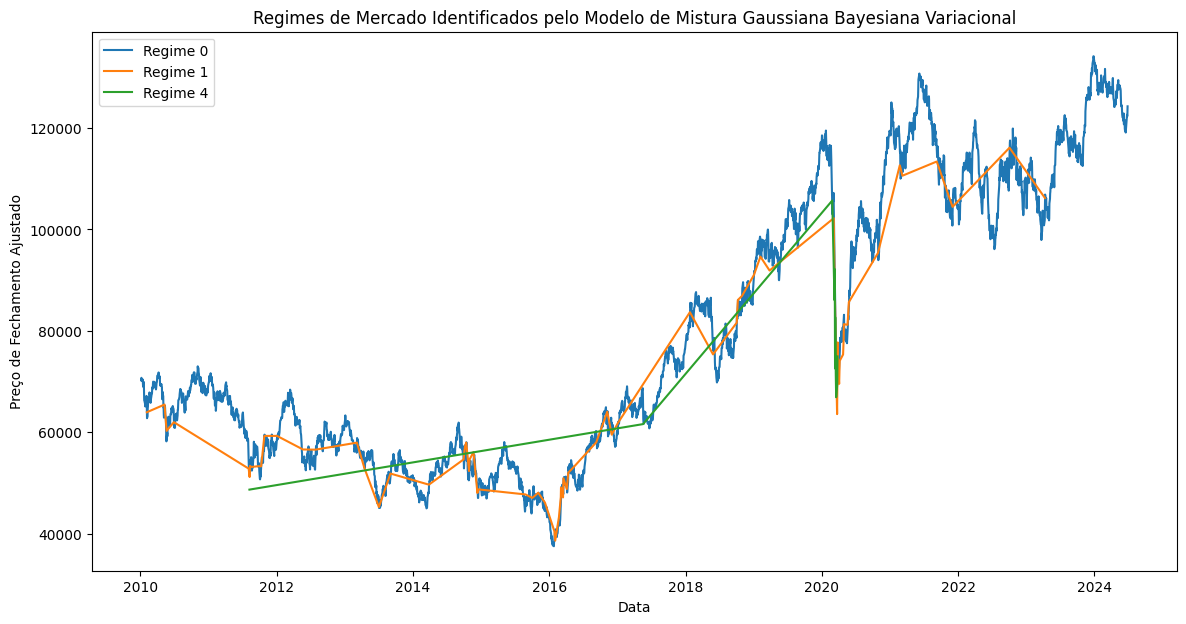

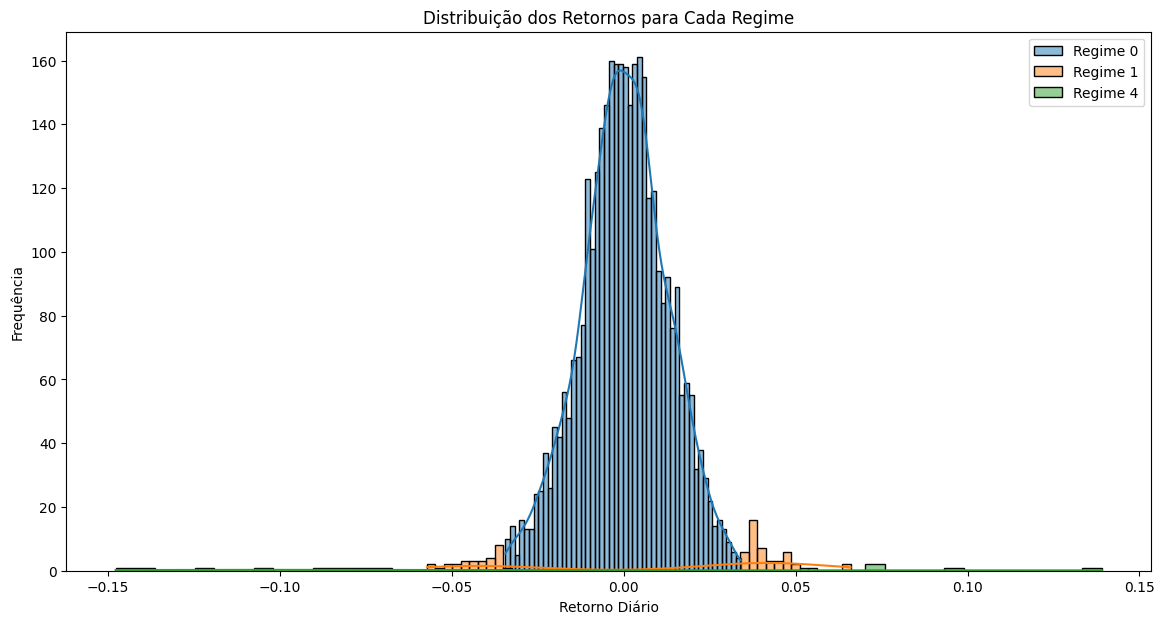

Médias dos Retornos para Cada Regime:
[[ 0.00027275]
 [ 0.00145974]
 [ 0.00024434]
 [ 0.00024458]
 [-0.01729654]
 [ 0.00034264]
 [ 0.00027322]
 [ 0.00027322]
 [ 0.00027322]
 [ 0.00027322]]
Covariâncias dos Retornos para Cada Regime:
[[[1.60286647e-04]]

 [[5.03852080e-04]]

 [[2.25702141e-04]]

 [[2.25697814e-04]]

 [[4.75729028e-03]]

 [[5.78288230e-05]]

 [[2.25169484e-04]]

 [[2.25169475e-04]]

 [[2.25169475e-04]]

 [[2.25169475e-04]]]


<ipython-input-31-e604419b7292>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Responsibility_{i}'] = responsibilities[:, i]
<ipython-input-31-e604419b7292>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Responsibility_{i}'] = responsibilities[:, i]
<ipython-input-31-e604419b7292>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

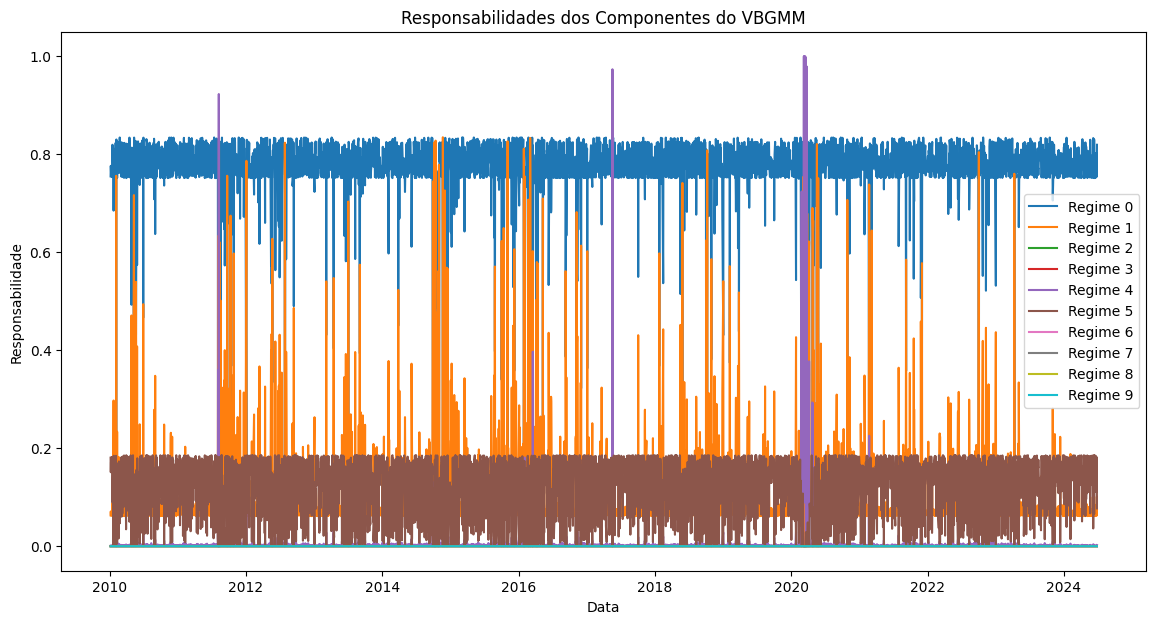

In [ ]:
start = time.time()

# Passo 1: Carregar e Preparar Dados Financeiros
# Baixar dados históricos do Ibovespa
ticker = "^BVSP"  # Índice Ibovespa
data = yf.download(ticker, start="2010-01-01", end="2024-06-28")
data['Return'] = data['Adj Close'].pct_change()

# Remover os valores NaN introduzidos pelo pct_change()
data = data.dropna(subset=['Return'])

# Preparar os dados de retornos
returns = data['Return'].values.reshape(-1, 1)

# Passo 2: Ajustar um Modelo de Mistura Gaussiana Bayesiana Variacional
max_components = 10  # Número máximo de regimes de mercado a serem considerados
vbgmm = BayesianGaussianMixture(n_components=max_components, covariance_type='full', max_iter=1000, random_state=42, verbose=2)
vbgmm.fit(returns)

# Prever os regimes
data['Regime'] = vbgmm.predict(returns)
data['Regime'] = data['Regime'].astype(int)

# Passo 3: Avaliar o Modelo
# Plotar os regimes identificados
plt.figure(figsize=(14, 7))
for i in range(max_components):
    regime_data = data[data['Regime'] == i]
    if not regime_data.empty:
        plt.plot(regime_data['Adj Close'], label=f'Regime {i}')
plt.title('Regimes de Mercado Identificados pelo Modelo de Mistura Gaussiana Bayesiana Variacional')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()
plt.show()

# Plotar o histograma dos retornos para cada regime
plt.figure(figsize=(14, 7))
for i in range(max_components):
    regime_data = data[data['Regime'] == i]
    if not regime_data.empty:
        sns.histplot(regime_data['Return'], bins=50, label=f'Regime {i}', kde=True)
plt.title('Distribuição dos Retornos para Cada Regime')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Calcular a média e a covariância dos retornos para cada regime
means = vbgmm.means_
covariances = vbgmm.covariances_

print("Médias dos Retornos para Cada Regime:")
print(means)

print("Covariâncias dos Retornos para Cada Regime:")
print(covariances)

# Calcular responsabilidades (probabilidades) para cada componente
responsibilities = vbgmm.predict_proba(returns)
for i in range(max_components):
    data[f'Responsibility_{i}'] = responsibilities[:, i]

# Plotar as responsabilidades
plt.figure(figsize=(14, 7))
for i in range(max_components):
    plt.plot(data.index, data[f'Responsibility_{i}'], label=f'Regime {i}')
plt.title('Responsabilidades dos Componentes do VBGMM')
plt.xlabel('Data')
plt.ylabel('Responsabilidade')
plt.legend()
plt.show()

end = time.time()

dif = end - start

In [ ]:
print(dif)

8.80511212348938


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fo

In [ ]:
!jupyter nbconvert --to HTML "Trabalho_Estatística_Computacional_Inferência_sobre_modelos_de_mistura.ipynb"

[NbConvertApp] Converting notebook Trabalho_Estatística_Computacional_Inferência_sobre_modelos_de_mistura.ipynb to HTML
[NbConvertApp] Writing 3824101 bytes to Trabalho_Estatística_Computacional_Inferência_sobre_modelos_de_mistura.html
